<a href="https://colab.research.google.com/github/AmiMunshi/Data-compression-using-python/blob/master/JPEG_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as  np
import math 
from scipy.fftpack import dct,idct
import cv2
import matplotlib.pyplot as plt

In [33]:
img = cv2.imread('/lena_gray_512.tif',0)  # Read the image
m,n= img.shape #Find and store size of image in m,n

In [34]:
# Function to perform 2D DCT and IDCT
def dct2(a):
    return dct(dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct(idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [35]:
# Function to perform JPEG
def jpeg(a):
  #a=a-128
  adct= dct2(a)
  q=np.array([[16,11,10,16,24,40,51,61],
                   [12,12,14,19,26,58,60,55],
                   [14,13,16,24,40,57,69,56],
                   [14,17,22,29,51,87,80,62],
                   [18,22,37,56,68,109,103,77],
                   [24,35,55,64,81,104,113,92],
                   [49,64,78,87,103,121,120,101],
                   [72,92,95,98,112,100,103,99]])
  aquant=adct/q
  aquant= aquant.round()
  return (aquant)


In [36]:
# Function to perform reverse steps (jpeg decoder)
def jpeginv(a):
  aidct=idct2(a)
  #aest= aidct+128
  aest=aidct.round()
  return (aest)


In [37]:
#Extracting 8X8 block from original image and applying jpeg encoding
N= 8 #Size of the block
img_jpeg = np.zeros((m,n), dtype=int)
for row in range(m//N):

        for col in range(n//N):
               img_jpeg[row*N:(row+1)*N,col*N:(col+1)*N]= jpeg(img[row*N:(row+1)*N,col*N:(col+1)*N])



In [38]:
# Merging 8X8 block after applying jpeg decoding
img_new = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               img_new[row*N:(row+1)*N,col*N:(col+1)*N]= jpeginv(img_jpeg[row*N:(row+1)*N,col*N:(col+1)*N])

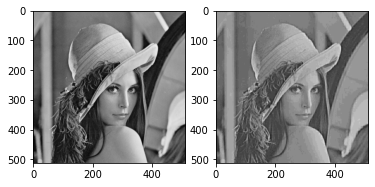

In [46]:
#Plot oringinal and reconstructed image
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_new, cmap="gray")



In [40]:

# Finding the nonzero values in the compressed matrix
nonzeros= np.sum([img_jpeg!=0])
print(nonzeros)

28535


In [41]:
# Compression ratio
CR= m*n/nonzeros
print(CR)

9.186753110215525
